In [ ]:
### Exploring network weights with and without batch normalization, particularly before the softmax ###
import caffe
caffe.set_mode_cpu()
net = caffe.Net('/home/cfinn/fpcontrol/train_val_autoencoder_slow_bn_flex.prototxt',
                '/home/cfinn/fpcontrol/snapshot/trial_autoencoder8_smooth1e-1_bn_flex_iter_7000.caffemodel',1)

In [ ]:
net.params

In [1]:
cd /home/cfinn/fpcontrol

/home/cfinn/fpcontrol


In [2]:
import visualize
import matplotlib as mpl
from matplotlib.colors import colorConverter
import matplotlib.pyplot as plt
import numpy as np
IMAGE_SIZE = 240
%matplotlib inline

In [3]:
#vis = visualize.Visualizer('./trial_output8smooth1e-1_autoencoder.h5')
#vis = visualize.Visualizer('./trial09-03_output8smooth1e-1_autoencoder.h5')

# Contains the data/analysis used to train the successful lego push 2
#vis = visualize.Visualizer('./legopush09-05_output16smooth_autoencoder.h5')
#vis = visualize.Visualizer('./ricebowl_09-08_output16smooth_autoencoder.h5')
vis = visualize.Visualizer('scoop_09-12_output16smooth_autoencoder.h5')

#vis = visualize.Visualizer('/home/cfinn/final_fpcontrol/video/scoop_figure_data_out.h5')

#vis = visualize.Visualizer('rope_09-13_output16smooth_autoencoder.h5')
#vis = visualize.Visualizer('pingpong_white.h5')

#vis = visualize.Visualizer('scoop_ae_withstate.h5')

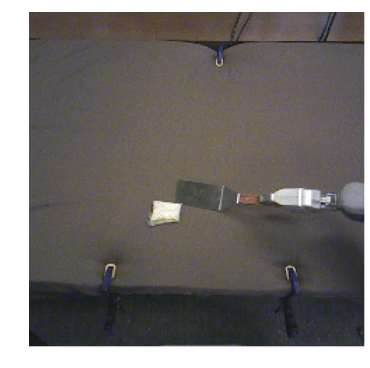

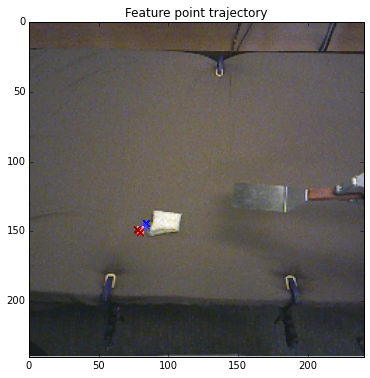

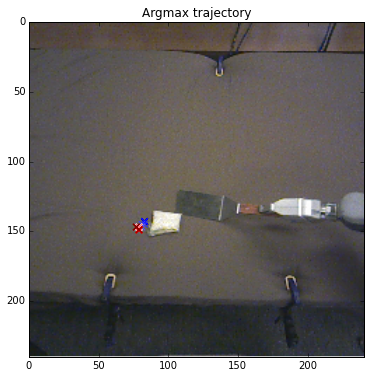

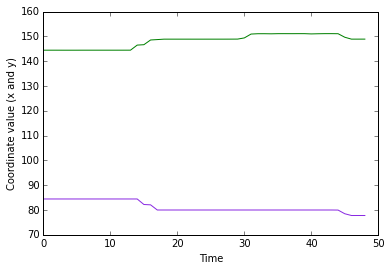

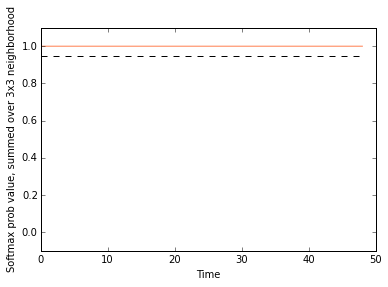

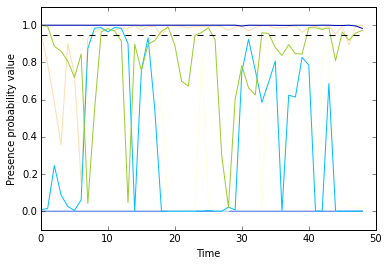

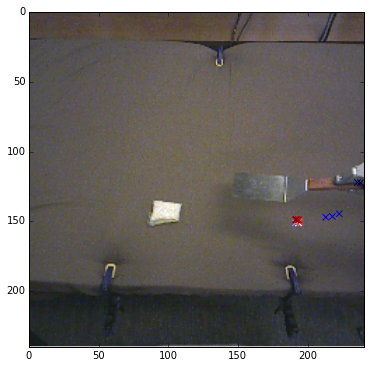

In [18]:
batch = 0; fpnum = 1; T=49; thresh = 0.95 # fp 0 - bimodal,  1,2,3 - cleanly on box, 4 - follows gripper, 6 - not good
# 4
# 11
img_idx = 0;
img_idx2 = 10;

# FOR RICEBOWL
# Equal to 1:   1, 2, (4), 6, 9, 14
# Between 0.8 and 1: 11
# Fluctuates between 0 and 1: 12
# Around 0.65: 7, (10-highvar)
# Less than 0.8 always: 15
# Always around 0:   0, 3, 5, 8, 13

# FOR LEGO
# Always equal to 1: 1+[1,2,3,10] = [2,3,4,11] 
# Present except t=zero: 5,6,8,9,12,13

vis_data = vis.sft[batch,:,fpnum,:,:]
#vis_data -= vis_data.min(); vis_data /= vis_data.max()
rgb_data = vis.imgs[batch,:,:,:,:]; fp = vis.fp[batch,:,:]
cm = plt.get_cmap('winter');

# Calculate feature presence indicators
x_ind = [min(108,int(fp[t,fpnum,1]*109/240)) for t in range(T)]
y_ind = [min(108,int(fp[t,fpnum,0]*109/240)) for t in range(T)]
ngh = 1;
softmax_local_vals=[vis.sft[batch,t,fpnum,x_ind[t]-1:x_ind[t]+2,y_ind[t]-1:y_ind[t]+2].sum() for t in range(T)]
argmaxes = np.array([np.unravel_index(np.argmax(vis.sft[batch,t,fpnum,:,:]), (109,109)) for t in range(T)])
argmax_vals = np.array([vis.sft[batch,t,fpnum,argmaxes[t,0]-1:argmaxes[t,0]+2,argmaxes[t,1]-1:argmaxes[t,1]+2].sum()
                        for t in range(T)])
#argmax_vals2 = np.zeros([T,2])
#for t in range(T):
#    inds = np.unravel_index(np.argmax(vis.sft[batch,t,fpnum,:,:]),(109,109))
#    vis.sft[batch,t,fpnum,inds[0],inds[1]] = -1
#    argmax_vals2[t,:] = np.unravel_index(np.argmax(vis.sft[batch,t,fpnum,:,:]),(109,109))

#plt.figure(figsize=(6,6)); ax =  plt.gca();
#ax.set_xlim([0, IMAGE_SIZE]); ax.set_ylim([IMAGE_SIZE,0]) 
#plt.imshow(rgb_data[10,:,:,:].transpose([1,2,0])); plt.hold(True); plt.title('Feature point trajectory')
##for t in range(0,81,10):
#    if t == 80:
#        plt.scatter(fp[t,:,0],fp[t,:,1],marker='o', c=np.array(range(16))/float(16),s=40,zorder=2,
#                    cmap=plt.get_cmap('rainbow'))
#    else:
#        plt.scatter(fp[t,:,0],fp[t,:,1],marker='x', c=np.array(range(16))/float(16),s=40,zorder=2,
#                    cmap=plt.get_cmap('rainbow'))

plt.figure(figsize=(6,6)); ax =  plt.gca();
ax.set_xlim([0, IMAGE_SIZE]); ax.set_ylim([IMAGE_SIZE,0]) 
plt.imshow(rgb_data[10,:,:,:].transpose([1,2,0])); plt.axis('off')

# Plot feature point trajectory on top of initial image.
plt.figure(figsize=(6,6)); ax =  plt.gca();
ax.set_xlim([0, IMAGE_SIZE]); ax.set_ylim([IMAGE_SIZE,0]) 
plt.imshow(rgb_data[img_idx,:,:,:].transpose([1,2,0])); plt.hold(True); plt.title('Feature point trajectory')
plt.plot(fp[0:T,fpnum,0],fp[0:T,fpnum,1],'-',zorder=1,color='gray')
plt.scatter(fp[0:T,fpnum,0],fp[0:T,fpnum,1], c=np.array(range(T))/float(T),s=40,zorder=2,
            cmap=plt.get_cmap('seismic'),marker='x')

# Plot argmax trajectory on top of initial image.
plt.figure(figsize=(6,6)); ax =  plt.gca();
ax.set_xlim([0, IMAGE_SIZE]); ax.set_ylim([IMAGE_SIZE,0])
plt.imshow(rgb_data[img_idx2,:,:,:].transpose([1,2,0])); plt.hold(True); plt.title('Argmax trajectory')
plt.plot(argmaxes[0:T,1]*240/109,argmaxes[0:T,0]*240/109,'-',zorder=1,color='gray')
plt.scatter(argmaxes[0:T,1]*240/109,argmaxes[0:T,0]*240/109, c=np.array(range(T))/float(T),s=40,zorder=2,
            cmap=plt.get_cmap('seismic'),marker='x')

# Plot argmax trajectory on top of initial image.
#plt.figure(figsize=(6,6)); ax =  plt.gca();
#ax.set_xlim([0, IMAGE_SIZE]); ax.set_ylim([IMAGE_SIZE,0])
#plt.imshow(rgb_data[0,:,:,:].transpose([1,2,0])); plt.hold(True); plt.title('Argmax trajectory')
#plt.plot(argmax_vals2[0:T,1]*240/109,argmax_vals2[0:T,0]*240/109,'-',zorder=1,color='gray')
#plt.scatter(argmax_vals2[0:T,1]*240/109,argmax_vals2[0:T,0]*240/109, c=np.array(range(T))/float(T),s=40,zorder=2,
#            cmap=plt.get_cmap('seismic'),marker='x')


# Plot feature point x/y values over time.
plt.figure(); plt.plot(fp[0:T,fpnum,0],color='blueviolet'); plt.hold(True);
plt.plot(fp[0:T,fpnum,1],'g'); plt.ylabel('Coordinate value (x and y)'); plt.xlabel('Time')

# Plot pooled softmax vals
plt.figure(); plt.plot(softmax_local_vals,color='coral'); plt.hold(True); plt.plot(range(T),np.ones(T)*thresh, 'k--')
plt.ylabel('Softmax prob value, summed over 3x3 neighborhood'); plt.xlabel('Time'); plt.ylim([-0.1,1.1])

fp_rank = [4,14,11,0,3,5,1,13,7,12,6,2,9,8,10,15]
fp_bad = [8,9,10,15,2,6,12,7]
plt.figure(); plt.hold(True)
my_colors = ['coral','green','sandybrown','darkseagreen','darkslateblue','forestgreen','floralwhite',
             'gray','indigo','lavender','mediumaquamarine','mediumblue','blue','mintcream','darkred',
            'salmon']
for fpnum in reversed(fp_rank[0:8]):
    x_ind = [min(108,int(fp[t,fpnum,1]*109/240)) for t in range(T)]
    y_ind = [min(108,int(fp[t,fpnum,0]*109/240)) for t in range(T)]
    softmax_local_vals=[vis.sft[batch,t,fpnum,x_ind[t]-1:x_ind[t]+2,y_ind[t]-1:y_ind[t]+2].sum() for t in range(T)]
    if fpnum in fp_bad:
        plt.plot(softmax_local_vals,'--',color=str(sorted_colors[fpnum*6+45][0]));
    else:
        plt.plot(softmax_local_vals,'-',color=str(sorted_colors[fpnum*6+45][0]));
plt.plot(range(T),np.ones(T)*thresh, 'k--')
plt.ylabel('Presence probability value'); plt.xlabel('Time'); plt.ylim([-0.1,1.1])
    

# Plot argmax vals
#plt.figure(); plt.plot(argmax_vals,color='lightblue'); plt.hold(True); plt.plot(range(T),np.ones(T)*thresh, 'k--')
#plt.ylabel('Softmax prob value, summed over 3x3 neighborhood'); plt.xlabel('Time'); plt.ylim([-0.1,1.1])

# Plot fp trajectory without "absent" features
plt.figure(figsize=(6,6)); ax=plt.gca(); ax.set_xlim([0, IMAGE_SIZE]); ax.set_ylim([IMAGE_SIZE,0]) 
plt.imshow(rgb_data[0,:,:,:].transpose([1,2,0])); plt.hold(True)
present_idx = [t for t in range(T) if softmax_local_vals[t]>thresh]
plt.scatter(fp[present_idx,fpnum,0],fp[present_idx,fpnum,1],
            c=np.array(present_idx)/float(T),s=40,zorder=2,cmap=plt.get_cmap('seismic'),marker='x')

In [26]:
reload(visualize)

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1256: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'visualize' from 'visualize.pyc'>

0


IndexError: too many indices for array

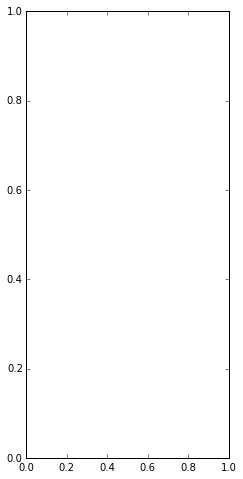

In [28]:
for batch in range(3):
    print batch
    for t in range(0,49+1,4):
        plt.figure(figsize=(8,8));
        plt.subplot(1,2,1); plt.imshow(np.reshape(255-vis.recon[batch,t,:],[60,60]),cmap='Greys'); plt.title('Reconstruction');
        plt.subplot(1,2,2); plt.imshow(np.reshape(255-vis.downsamp[batch,t,:],[60,60]),cmap='Greys'); plt.title('Ground truth');


In [ ]:
import h5py
filepath = './trial_output8smooth1e-1_flex_autoencoder.h5'
f = h5py.File(filepath, 'r')

In [126]:
fp.shape

(8, 16, 2, 1)

In [128]:
fp[batch,fpnum,0]

array([ 49.06010437], dtype=float32)

In [127]:
fpnum

8

In [55]:
colors = ['coral','blue','green']

In [56]:
colors

['coral', 'blue', 'green']

In [57]:
colors[0]

'coral'

In [6]:
import six
from matplotlib import colors as mcolors
colors_ = list(six.iteritems(mcolors.cnames))

# Add the single letter colors.
for name, rgb in six.iteritems(mcolors.ColorConverter.colors):
    hex_ = mcolors.rgb2hex(rgb)
    colors_.append((name, hex_))

In [7]:
str(colors_[4][0])


'indianred'

In [8]:
# Transform to hex color values.
hex_ = [color[1] for color in colors_]
# Get the rgb equivalent.
rgb = [mcolors.hex2color(color) for color in hex_]
# Get the hsv equivalent.
hsv = [mcolors.rgb_to_hsv(color) for color in rgb]

# Split the hsv values to sort.
hue = [color[0] for color in hsv]
sat = [color[1] for color in hsv]
val = [color[2] for color in hsv]

# Sort by hue, saturation and value.
ind = np.lexsort((val, sat, hue))
sorted_colors = [colors_[i] for i in ind]

In [100]:
len(sorted_colors)


158

In [103]:
fprank

NameError: name 'fprank' is not defined

In [124]:
#sft.shape

fp_reshape.shape


(1, 98, 16, 2)

In [120]:
sft = vis.sft[0:2,:,:,:,:]
fp = vis.fp[0:2,:,:]

In [125]:
sft_reshape=sft.reshape([1,98,16,109,109])
fp_reshape = fp.reshape([98,16,2])

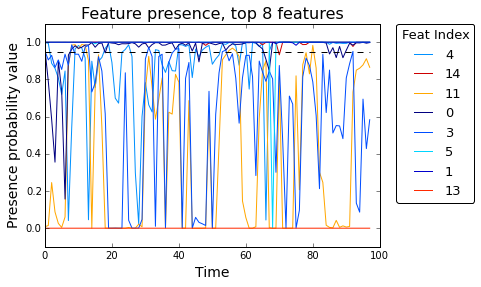

In [176]:
T = 98
fp_rank = [4,14,11,0,3,5,1,13,7,12,6,2,9,8,10,15]
fp_bad = [8,9,10,15,2,6,12,7]
plt.figure(); plt.hold(True)

import matplotlib.colors as colors
import matplotlib.cm as cmx
NCURVES = 16
np.random.seed(101)
values = range(NCURVES)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
my_colors = ['coral','green','sandybrown','darkseagreen','darkslateblue','forestgreen','floralwhite',
             'gray','indigo','lavender','mediumaquamarine','mediumblue','blue','mintcream','darkred',
            'salmon']
for fpnum in fp_rank[0:8]:
    x_ind = [min(108,int(fp_reshape[t,fpnum,1]*109/240)) for t in range(T)]
    y_ind = [min(108,int(fp_reshape[t,fpnum,0]*109/240)) for t in range(T)]
    softmax_local_vals=[sft_reshape[batch,t,fpnum,x_ind[t]-1:x_ind[t]+2,y_ind[t]-1:y_ind[t]+2].sum() for t in range(T)]
    #if fpnum in fp_bad:
    plt.plot(softmax_local_vals,'-',color= scalarMap.to_rgba(values[fpnum]))  ###str(sorted_colors[fpnum*6+5][0]));
    #else:
    #    plt.plot(softmax_local_vals,'-',color=str(sorted_colors[fpnum*6+5][0]));

from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size(13)
leg = plt.legend([str(i) for i in fp_rank[0:8]],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Feat Index',prop = fontP,fancybox=True,shadow=False)
plt.setp(leg.get_title(),fontsize=13)

plt.plot(range(T),np.ones(T)*thresh, 'k--')
plt.ylabel('Presence probability value',fontsize=14); plt.xlabel('Time',fontsize=14); plt.ylim([-0.1,1.1])
plt.title('Feature presence, top 8 features',fontsize=16);

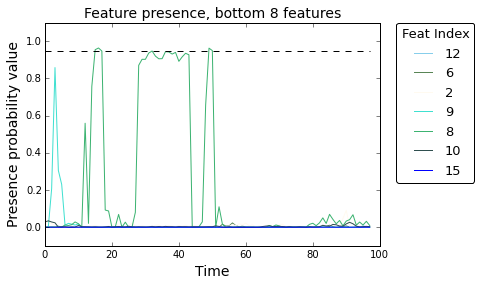

In [158]:
T = 98
fp_rank = [4,14,11,0,3,5,1,13,7,12,6,2,9,8,10,15]
fp_bad = [8,9,10,15,2,6,12,7]
plt.figure(); plt.hold(True)
my_colors = ['coral','green','sandybrown','darkseagreen','darkslateblue','forestgreen','floralwhite',
             'gray','indigo','lavender','mediumaquamarine','mediumblue','blue','mintcream','darkred',
            'salmon']
for fpnum in fp_rank[8:]:
    x_ind = [min(108,int(fp_reshape[t,fpnum,1]*109/240)) for t in range(T)]
    y_ind = [min(108,int(fp_reshape[t,fpnum,0]*109/240)) for t in range(T)]
    softmax_local_vals=[sft_reshape[batch,t,fpnum,x_ind[t]-1:x_ind[t]+2,y_ind[t]-1:y_ind[t]+2].sum() for t in range(T)]
    if fpnum in fp_bad:
        plt.plot(softmax_local_vals,'-',color=str(sorted_colors[fpnum*6+40][0]));
    else:
        plt.plot(softmax_local_vals,'-',color=str(sorted_colors[fpnum*6+44][0]));
        
fontP = FontProperties()
fontP.set_size(13)
leg = plt.legend([str(i) for i in fp_rank[8:]],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Feat Index',prop = fontP,fancybox=True,shadow=False)
plt.setp(leg.get_title(),fontsize=13)

plt.plot(range(T),np.ones(T)*thresh, 'k--')
plt.ylabel('Presence probability value',fontsize=14); plt.xlabel('Time',fontsize=14); plt.ylim([-0.1,1.1])
plt.title('Feature presence, bottom 8 features',fontsize=14);

In [168]:
plt.colormaps['BrBG']

TypeError: 'function' object has no attribute '__getitem__'

In [169]:
c,

NameError: name 'c' is not defined

In [170]:
cm

NameError: name 'fp_reshape' is not defined

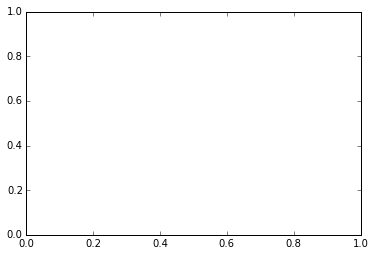

In [14]:
T = 98
fp_rank = [4,14,11,0,3,5,1,13,7,12,6,2,9,8,10,15]
fp_bad = [8,9,10,15,2,6,12,7]
plt.figure(); plt.hold(True)

import matplotlib.colors as colors
import matplotlib.cm as cmx
NCURVES = 16
np.random.seed(101)
values = range(NCURVES)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
my_colors = ['coral','green','sandybrown','darkseagreen','darkslateblue','forestgreen','floralwhite',
             'gray','indigo','lavender','mediumaquamarine','mediumblue','blue','mintcream','darkred',
            'salmon']

fpnum = 0
x_ind = [min(108,int(fp_reshape[t,fpnum,1]*109/240)) for t in range(T)]
y_ind = [min(108,int(fp_reshape[t,fpnum,0]*109/240)) for t in range(T)]
softmax_local_vals=[sft_reshape[batch,t,fpnum,x_ind[t]-1:x_ind[t]+2,y_ind[t]-1:y_ind[t]+2].sum() for t in range(T)]
    #if fpnum in fp_bad:
plt.plot(softmax_local_vals,'-',color= scalarMap.to_rgba(values[4]),linewidth=3)  ###str(sorted_colors[fpnum*6+5][0]));
    #else:
    #    plt.plot(softmax_local_vals,'-',color=str(sorted_colors[fpnum*6+5][0]));

from matplotlib.font_manager import FontProperties

#fontP = FontProperties()
#fontP.set_size(13)
#leg = plt.legend([str(i) for i in fp_rank[0:8]],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Feat Index',prop = fontP,fancybox=True,shadow=False)
#plt.setp(leg.get_title(),fontsize=13)

plt.plot(range(T),np.ones(T)*thresh, 'k--')
plt.ylabel('Presence probability value',fontsize=16); plt.xlabel('Time',fontsize=16); plt.ylim([-0.1,1.1])
#plt.title('Feature presence, top 8 features',fontsize=16);

NameError: name 'rgb_data' is not defined

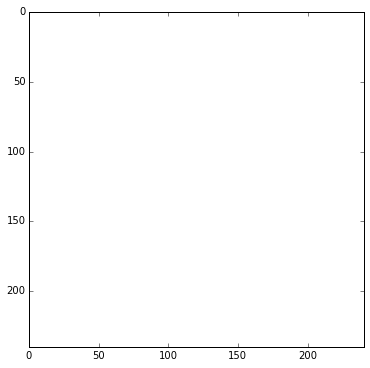

In [10]:
plt.figure(figsize=(6,6)); ax =  plt.gca();
fpnums = [4,14,0]
ax.set_xlim([0, IMAGE_SIZE]); ax.set_ylim([IMAGE_SIZE,0]) 
plt.imshow(rgb_data[img_idx,:,:,:].transpose([1,2,0])); plt.hold(True); plt.title('Feature point trajectory')
for fpnum in fpnums:
    plt.plot(fp_reshape[0:T,fpnum,0],fp_reshape[0:T,fpnum,1],'-',zorder=1,color='gray')
    plt.scatter(fp_reshape[0:T,fpnum,0],fp_reshape[0:T,fpnum,1], c=np.array(range(T))/float(T),s=40,zorder=2,
            cmap=plt.get_cmap('seismic'),marker='x')

In [12]:
batch = 0; T = 100; fpnum = 0;
vis_data = vis.sft[batch,:,fpnum,:,:]
#vis_data -= vis_data.min(); vis_data /= vis_data.max()
rgb_data = vis.imgs[batch,:,:,:,:]; fp = vis.fp[batch,:,:]
cm = plt.get_cmap('winter');

# Calculate feature presence indicators
x_ind = [min(108,int(fp[t,fpnum,1]*109/240)) for t in range(T)]
y_ind = [min(108,int(fp[t,fpnum,0]*109/240)) for t in range(T)]
ngh = 1;
softmax_local_vals=[vis.sft[batch,t,fpnum,x_ind[t]-1:x_ind[t]+2,y_ind[t]-1:y_ind[t]+2].sum() for t in range(T)]
argmaxes = np.array([np.unravel_index(np.argmax(vis.sft[batch,t,fpnum,:,:]), (109,109)) for t in range(T)])
argmax_vals = np.array([vis.sft[batch,t,fpnum,argmaxes[t,0]-1:argmaxes[t,0]+2,argmaxes[t,1]-1:argmaxes[t,1]+2].sum()
                        for t in range(T)])

NameError: name 'fpfiltered' is not defined

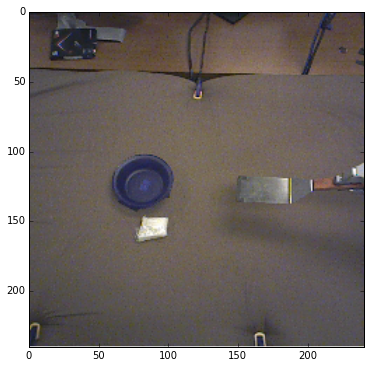

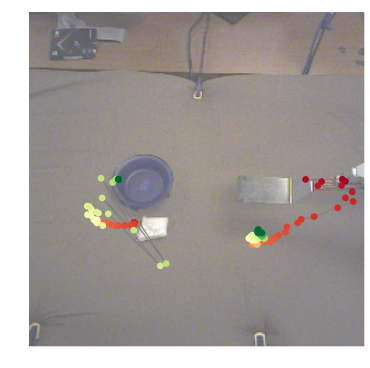

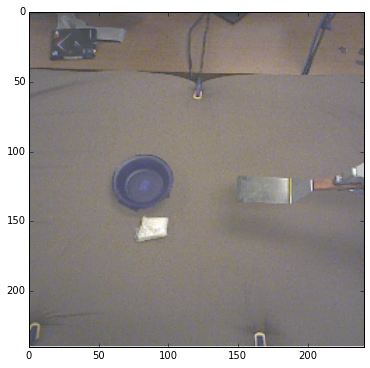

In [13]:
img_idx = 0;

plt.figure(figsize=(6,6)); ax =  plt.gca();
fpnums = [4,14]
ax.set_xlim([0, IMAGE_SIZE]); ax.set_ylim([IMAGE_SIZE,0]) 
#plt.imsave('/home/cfinn/scoopimg.png',rgb_data[img_idx,:,:,:].transpose([1,2,0]))
plt.imshow(rgb_data[img_idx,:,:,:].transpose([1,2,0]),alpha=1.0);

plt.figure(figsize=(6,6)); ax =  plt.gca();
fpnums = [4,14]
ax.set_xlim([0, IMAGE_SIZE]); ax.set_ylim([IMAGE_SIZE,0]) 
#plt.imsave('/home/cfinn/scoopimg.png',rgb_data[img_idx,:,:,:].transpose([1,2,0]))
plt.imshow(rgb_data[img_idx,:,:,:].transpose([1,2,0]),alpha=0.7); plt.hold(True);
#plt.title('Unfiltered feature point trajectories',fontsize=15)
for fpnum in fpnums:
    plt.plot(fp[0:T,fpnum,0],fp[0:T,fpnum,1],'-',zorder=1,color='gray')
    plt.scatter(fp[0:T,fpnum,0],fp[0:T,fpnum,1], c=np.array(range(T))/float(T),s=[180]*100,zorder=2,
            cmap=plt.get_cmap('RdYlGn'),marker='.',edgecolors='none')
plt.axis('off')


plt.figure(figsize=(6,6)); ax =  plt.gca();
fpnums = [4,14]
ax.set_xlim([0, IMAGE_SIZE]); ax.set_ylim([IMAGE_SIZE,0]) 
plt.imshow(rgb_data[0,:,:,:].transpose([1,2,0]),alpha=0.8); plt.hold(True);

#plt.title('Unfiltered feature point trajectories',fontsize=15)
for fpnum in fpnums:
    plt.plot(fpfiltered[0:T,fpnum,0],fpfiltered[0:T,fpnum,1],'-',zorder=1,color='gray')
    plt.scatter(fpfiltered[0:T,fpnum,0],fpfiltered[0:T,fpnum,1], c=np.array(range(T))/float(T),s=[180]*100,zorder=2,
            cmap=plt.get_cmap('RdYlGn'),marker='.',edgecolors='none')
plt.axis('off')

(-0.1, 1.1)

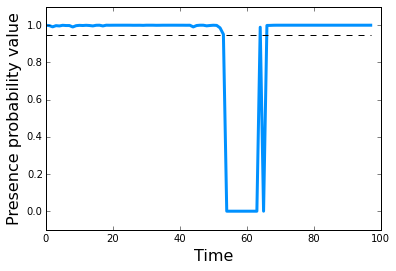

In [324]:
fpnum = 14
x_ind = [min(108,int(fp[t,fpnum,1]*109/240)) for t in range(T)]
y_ind = [min(108,int(fp[t,fpnum,0]*109/240)) for t in range(T)]
softmax_local_vals=[vis.sft[batch,t,fpnum,x_ind[t]-1:x_ind[t]+2,y_ind[t]-1:y_ind[t]+2].sum() for t in range(T)]
    #if fpnum in fp_bad:
plt.plot(softmax_local_vals,'-',color= scalarMap.to_rgba(values[4]),linewidth=3)  ###str(sorted_colors[fpnum*6+5][0]));
    #else:
    #    plt.plot(softmax_local_vals,'-',color=str(sorted_colors[fpnum*6+5][0]));

from matplotlib.font_manager import FontProperties

#fontP = FontProperties()
#fontP.set_size(13)
#leg = plt.legend([str(i) for i in fp_rank[0:8]],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Feat Index',prop = fontP,fancybox=True,shadow=False)
#plt.setp(leg.get_title(),fontsize=13)

plt.plot(range(T),np.ones(T)*thresh, 'k--')
plt.ylabel('Presence probability value',fontsize=16); plt.xlabel('Time',fontsize=16); plt.ylim([-0.1,1.1])


In [226]:
import h5py
f = h5py.File('/home/cfinn/chelsea/scoop_figure_data_out.h5','r')

In [227]:
f.keys()

[u'conv1_bn_relu1_0_split_1_0',
 u'conv2_bn_relu2_0_split_1_0',
 u'conv3_bn_conv3bn_reshape_0_split_1_0',
 u'conv3b_softmax_0_split_1_0',
 u'fp_xy_fc_images_0_split_1_0',
 u'rgb_frames+0_data_0_split_2_0']

In [232]:
c1 = f['conv1_bn_relu1_0_split_1_0']
c2 = f['conv2_bn_relu2_0_split_1_0']
c3 = f['conv3_bn_conv3bn_reshape_0_split_1_0']
rgb = f['rgb_frames+0_data_0_split_2_0']
rgb.shape

(100, 3, 240, 240)

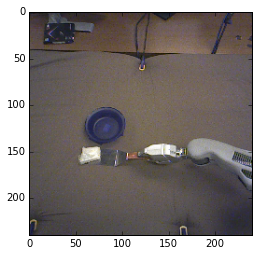

In [238]:
plt.figure(); plt.imshow(np.transpose(np.uint8(rgb[40,:,:,:]),[1,2,0]));


In [18]:
from scipy.io import loadmat

In [20]:
x = loadmat('/home/cfinn/final_fpcontrol/filtered.mat')

IOError: [Errno 2] No such file or directory: '/home/cfinn/final_fpcontrol/filtered.mat'

In [256]:
fpfiltered = x['fpf_permuted']
fpfiltered = (fpfiltered+1)*(240/2.0)

In [262]:
fpfiltered[0:10,4,0] = fp[0,4,0]
fpfiltered[0:10,4,1] = fp[0,4,1]

In [253]:
fp[0:15,4,:]

array([[[ 226.99432373],
        [ 121.38398743]],

       [[ 224.7230072 ],
        [ 119.90757751]],

       [[ 198.43011475],
        [ 119.99825287]],

       [[ 209.89868164],
        [ 121.58294678]],

       [[ 224.20413208],
        [ 124.4328537 ]],

       [[ 207.11543274],
        [ 124.60284424]],

       [[ 231.81115723],
        [ 128.90318298]],

       [[ 226.99156189],
        [ 133.24819946]],

       [[ 232.44372559],
        [ 135.82049561]],

       [[ 221.38169861],
        [ 140.35166931]]], dtype=float32)

In [38]:
legovis = visualize.Visualizer('/home/cfinn/final_fpcontrol/video/loop4_figure_data_out.h5')

In [39]:
batch = 0; T = 100; 
legorgb_data = legovis.imgs[batch,:,:,:,:]; legofp = legovis.fp[batch,:,:]

(0.0, 240.0, 240.0, 0.0)

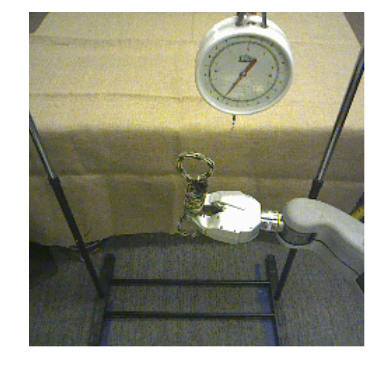

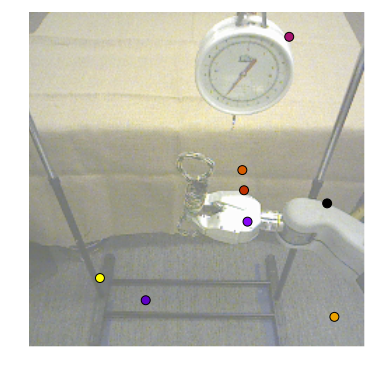

In [40]:
plt.figure(figsize=(6,6)); ax =  plt.gca();
t = 0;
fpnums = [[2,3,6,8,9,10,11,12]]
ax.set_xlim([0, IMAGE_SIZE]); ax.set_ylim([IMAGE_SIZE,0]) 
#plt.imsave('/home/cfinn/scoopimg.png',rgb_data[img_idx,:,:,:].transpose([1,2,0]))
plt.imshow(legorgb_data[t,:,:,:].transpose([1,2,0]),alpha=1.0);
plt.axis('off')

plt.figure(figsize=(6,6)); ax =  plt.gca();
ax.set_xlim([0, IMAGE_SIZE]); ax.set_ylim([IMAGE_SIZE,0]) 
#plt.imsave('/home/cfinn/scoopimg.png',rgb_data[img_idx,:,:,:].transpose([1,2,0]))
plt.imshow(legorgb_data[t,:,:,:].transpose([1,2,0]),alpha=0.6); plt.hold(True);
#plt.title('Unfiltered feature point trajectories',fontsize=15)
for fpnum in fpnums:
    plt.scatter(legofp[t,fpnums,0],legofp[t,fpnums,1], c=np.array(range(len(fpnums[0])))/float(len(fpnums[0])),s=[320]*100,zorder=2,
            cmap=plt.get_cmap('gnuplot'),marker='.',edgecolors='black')
plt.axis('off')

In [358]:
[range(16)]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]

In [30]:
vis.downsamp.shape

(0,)